In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import kmeans1d

In [27]:
df = pd.read_csv("justiceCentered.csv", encoding= 'unicode_escape')
df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,2000-001,2000-001-01,2000-001-01-01,2000-001-01-01-01-01,10/10/2000,4,531 U.S. 1,121 S. Ct. 292,148 L. Ed. 2d 1,2000 U.S. LEXIS 6841,...,9,0,102,WHRehnquist,1.0,1.0,2.0,2.0,NaN,NaN
1,2000-001,2000-001-01,2000-001-01-01,2000-001-01-01-01-02,10/10/2000,4,531 U.S. 1,121 S. Ct. 292,148 L. Ed. 2d 1,2000 U.S. LEXIS 6841,...,9,0,103,JPStevens,1.0,1.0,2.0,2.0,NaN,NaN
2,2000-001,2000-001-01,2000-001-01-01,2000-001-01-01-01-03,10/10/2000,4,531 U.S. 1,121 S. Ct. 292,148 L. Ed. 2d 1,2000 U.S. LEXIS 6841,...,9,0,104,SDOConnor,1.0,1.0,2.0,2.0,NaN,NaN
3,2000-001,2000-001-01,2000-001-01-01,2000-001-01-01-01-04,10/10/2000,4,531 U.S. 1,121 S. Ct. 292,148 L. Ed. 2d 1,2000 U.S. LEXIS 6841,...,9,0,105,AScalia,1.0,1.0,2.0,2.0,NaN,NaN
4,2000-001,2000-001-01,2000-001-01-01,2000-001-01-01-01-05,10/10/2000,4,531 U.S. 1,121 S. Ct. 292,148 L. Ed. 2d 1,2000 U.S. LEXIS 6841,...,9,0,106,AMKennedy,1.0,1.0,2.0,2.0,NaN,NaN


In [28]:
issueArea = df["issueArea"]
justice = df["justice"]
vote = df["vote"]
direction = df["direction"]


In [29]:
justiceCP = justice[issueArea == 1]
directionCP = direction[issueArea == 1]

directionCP

9        2.0
10       2.0
11       2.0
12       2.0
13       2.0
        ... 
14641    2.0
14642    2.0
14643    1.0
14644    1.0
14645    1.0
Name: direction, Length: 3944, dtype: float64

In [30]:
clusters, centroids = kmeans1d.cluster(directionCP, 2)
print(clusters)   # [1, 1, 1, 0, 3, 3, 3, 2, 2, 2]
print(centroids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [31]:
dataset = pd.DataFrame({'justice': justiceCP, 'direction': directionCP})

dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset['justice'] = dataset['justice'].astype(float)



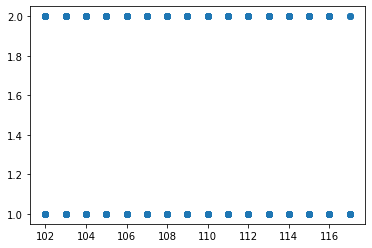

In [32]:
plt.scatter(justiceCP,directionCP, label='True Position')

In [33]:
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


In [34]:
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)

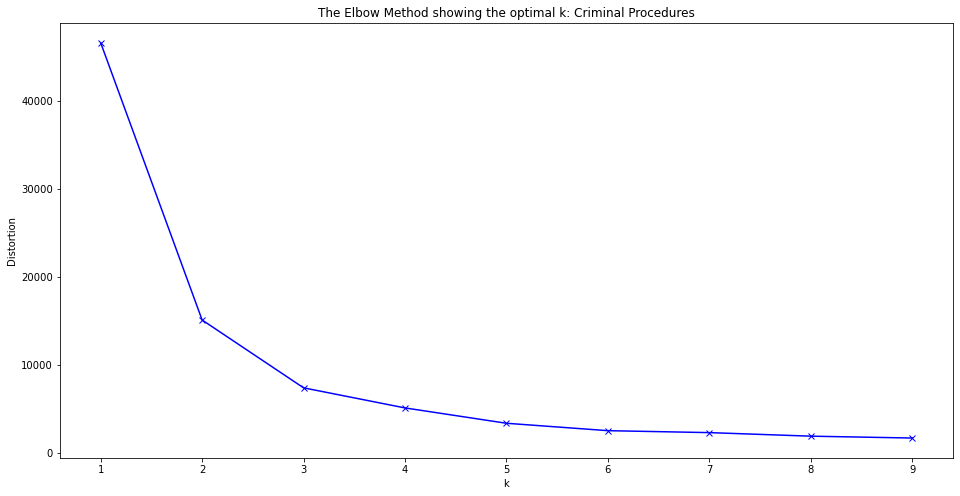

In [35]:
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Criminal Procedures')
plt.show()

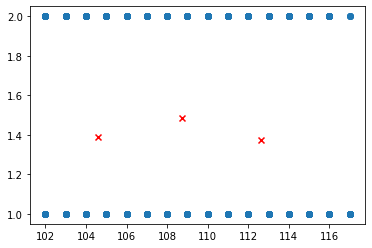

In [36]:
kmeans = KMeans(n_clusters=3).fit(dataset)
kmeans.cluster_centers_
kmeans.labels_[:]
plt.scatter(justiceCP, directionCP)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

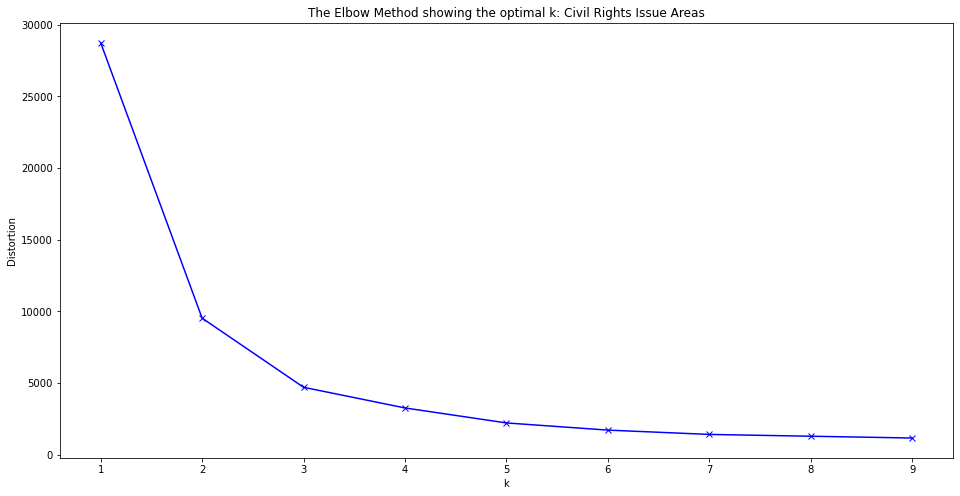

In [37]:
# Issue Area 2: Civil Rights
justiceCV = justice[issueArea == 2]
directionCV = direction[issueArea == 2]
dataset = pd.DataFrame({'justice': justiceCV, 'direction': directionCV})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Civil Rights Issue Areas')
plt.show()

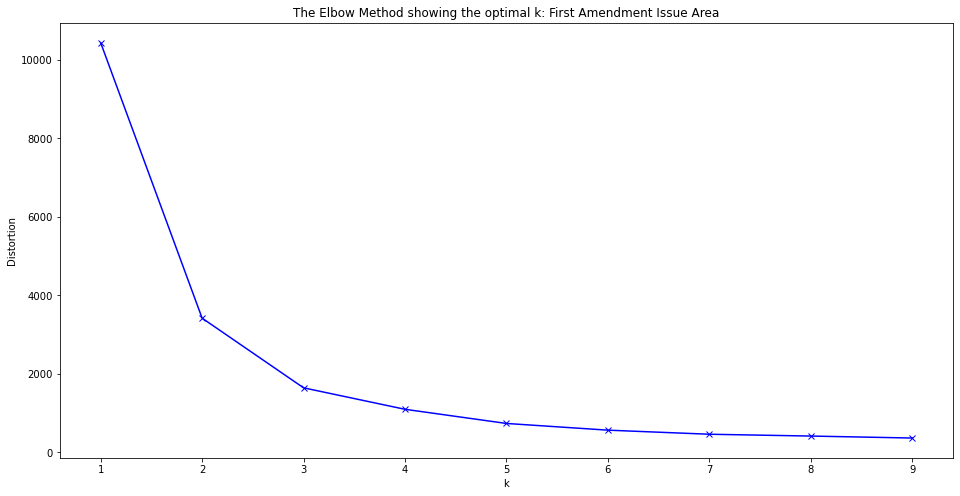

In [38]:
# Issue Area 3: First Amendment
justiceFA = justice[issueArea == 3]
directionFA = direction[issueArea == 3]
dataset = pd.DataFrame({'justice': justiceFA, 'direction': directionFA})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: First Amendment Issue Area')
plt.show()

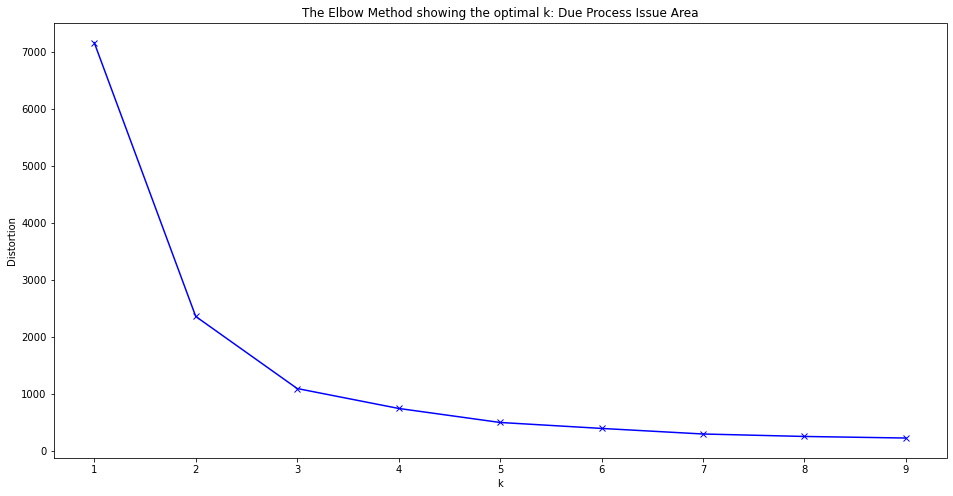

In [39]:
# Issue Area 4: Due Process
justiceDP = justice[issueArea == 4]
directionDP = direction[issueArea == 4]
dataset = pd.DataFrame({'justice': justiceDP, 'direction': directionDP})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Due Process Issue Area')
plt.show()

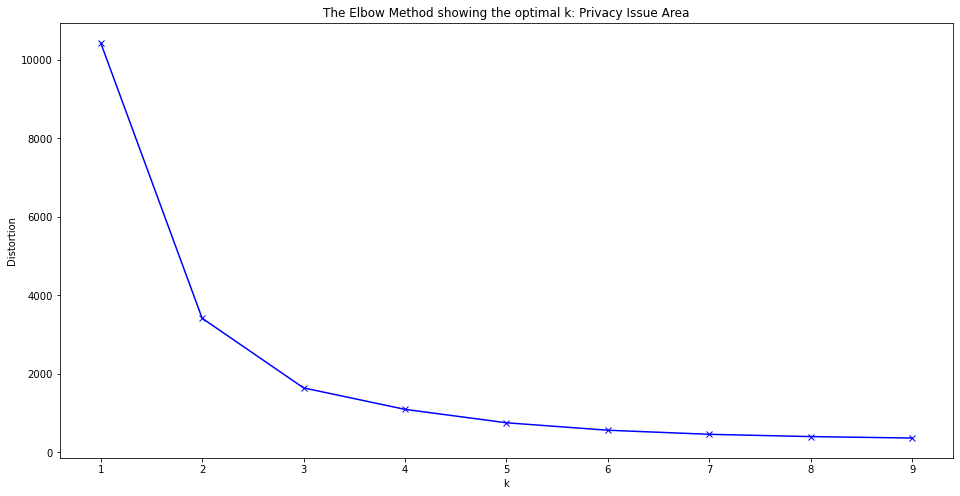

In [40]:
# Issue Area 5: Privacy
justiceP = justice[issueArea == 5]
directionP = direction[issueArea == 5]
dataset = pd.DataFrame({'justice': justiceP, 'direction': directionP})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Privacy Issue Area')
plt.show()

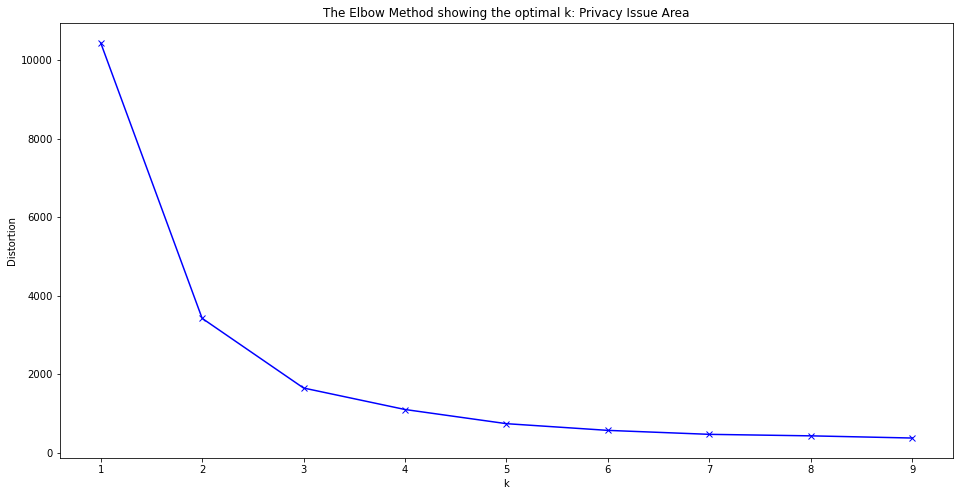

In [41]:
# Issue Area 6: Attorneys
justiceA = justice[issueArea == 6]
directionA = direction[issueArea == 6]
dataset = pd.DataFrame({'justice': justiceA, 'direction': directionA})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Privacy Issue Area')
plt.show()

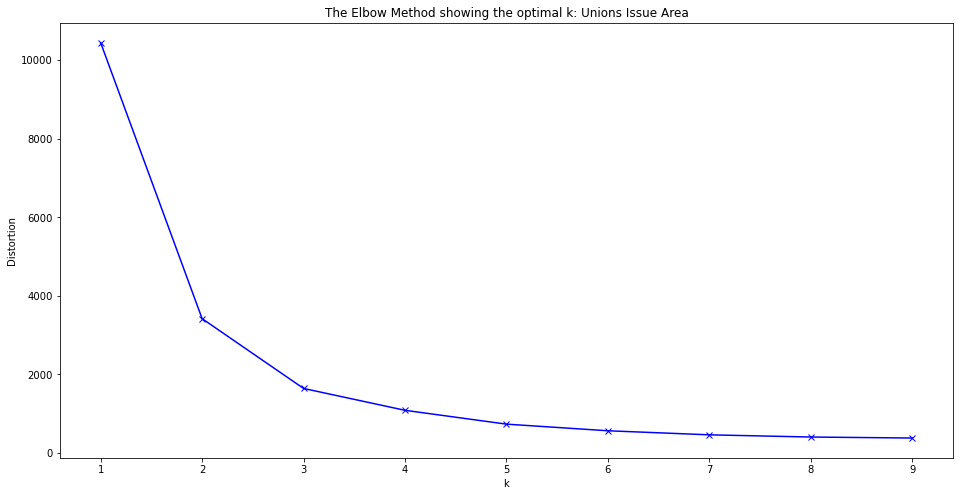

In [42]:
# Issue Area 7: Unions
justiceU = justice[issueArea == 7]
directionU = direction[issueArea == 7]
dataset = pd.DataFrame({'justice': justiceU, 'direction': directionU})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Unions Issue Area')
plt.show()

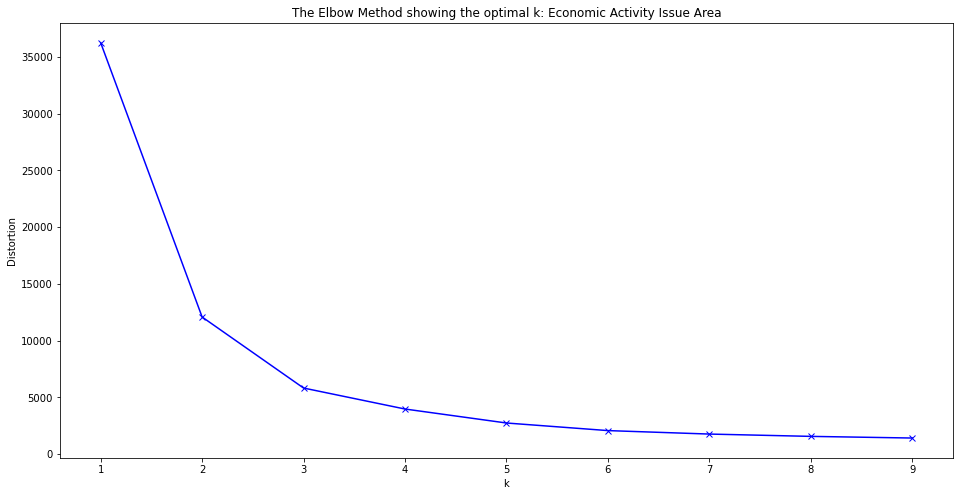

In [43]:
# Issue Area 8: Economic Activity
justiceEA = justice[issueArea == 8]
directionEA = direction[issueArea == 8]
dataset = pd.DataFrame({'justice': justiceEA, 'direction': directionEA})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Economic Activity Issue Area')
plt.show()

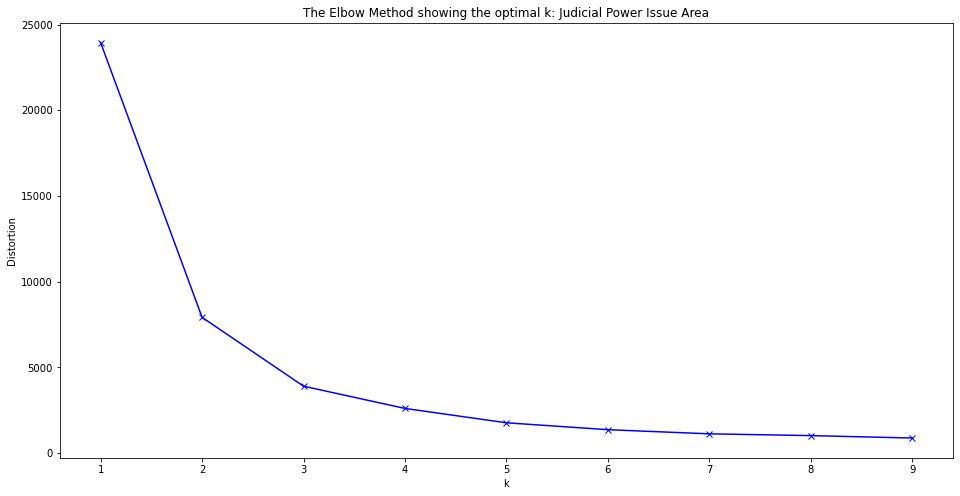

In [44]:
# Issue Area 9: Judicial Power
justiceJP = justice[issueArea == 9]
directionJP = direction[issueArea == 9]
dataset = pd.DataFrame({'justice': justiceJP, 'direction': directionJP})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Judicial Power Issue Area')
plt.show()

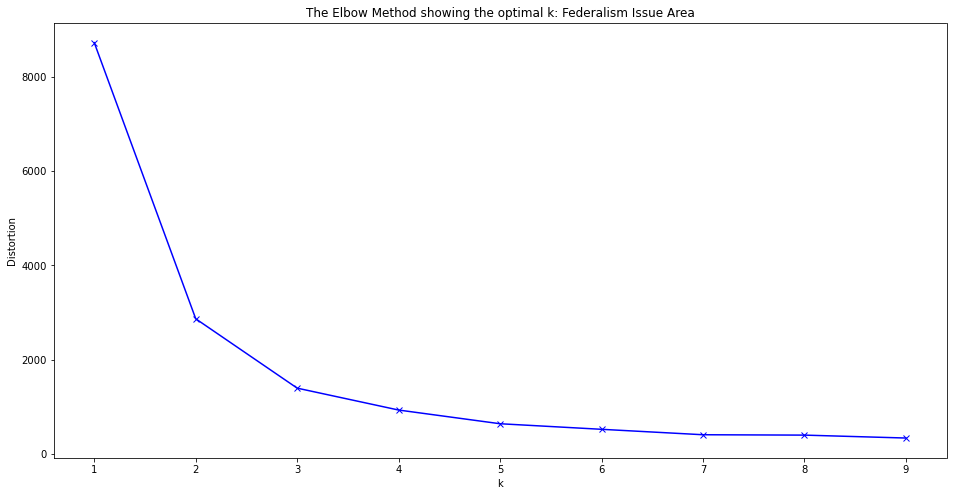

In [45]:
# Issue Area 10: Federalism
justiceF = justice[issueArea == 10]
directionF = direction[issueArea == 10]
dataset = pd.DataFrame({'justice': justiceF, 'direction': directionF})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Federalism Issue Area')
plt.show()

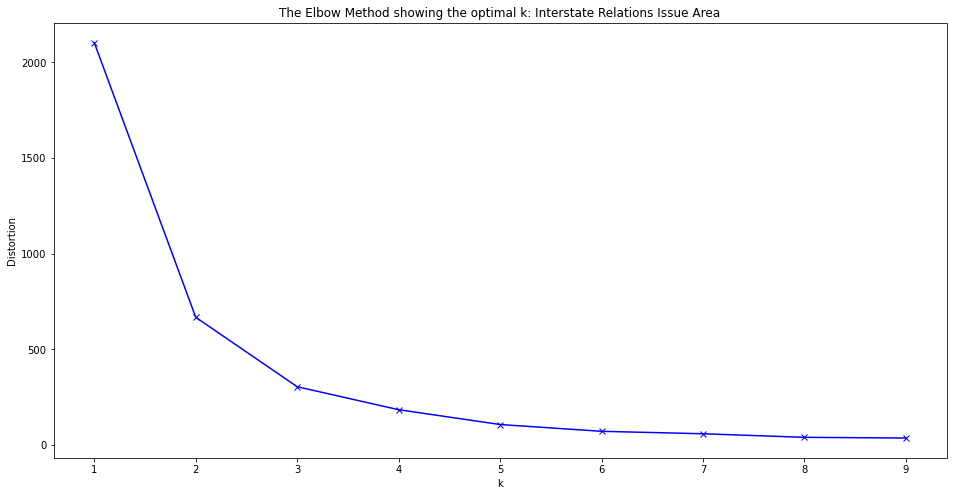

In [46]:
# Issue Area 11: Interstate Relations
justiceIR = justice[issueArea == 11]
directionsIR = direction[issueArea == 11]
dataset = pd.DataFrame({'justice': justiceIR, 'direction': directionsIR})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Interstate Relations Issue Area')
plt.show()

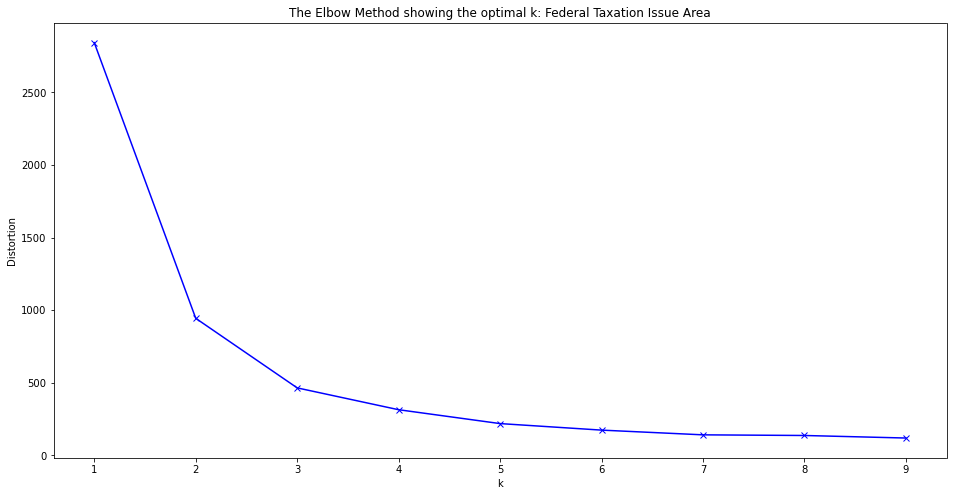

In [47]:
# Issue Area 12: Federal Taxation
justiceFT = justice[issueArea == 12]
directionFT = direction[issueArea == 12]
dataset = pd.DataFrame({'justice': justiceFT, 'direction': directionFT})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Federal Taxation Issue Area')
plt.show()

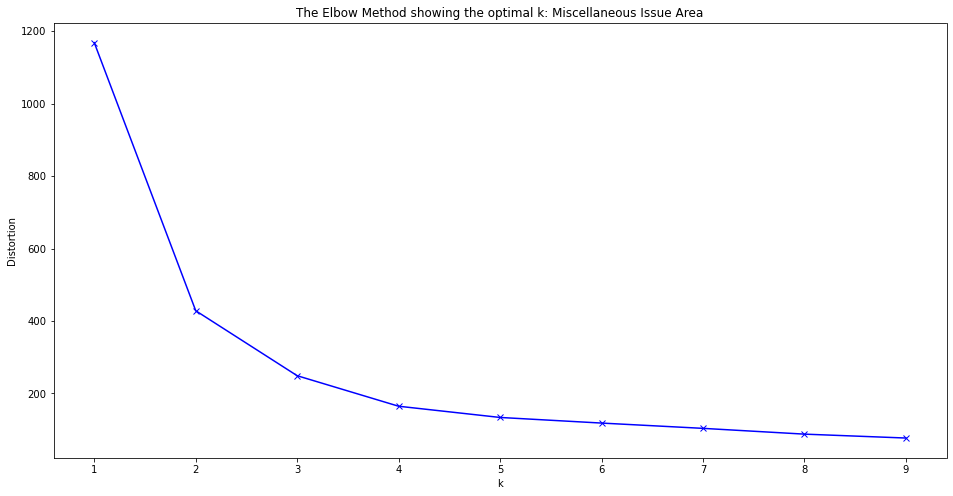

In [48]:
# Issue Area 13: Miscellaneous
justiceM = justice[issueArea == 13]
directionM = direction[issueArea == 13]
dataset = pd.DataFrame({'justice': justiceM, 'direction': directionM})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Miscellaneous Issue Area')
plt.show()

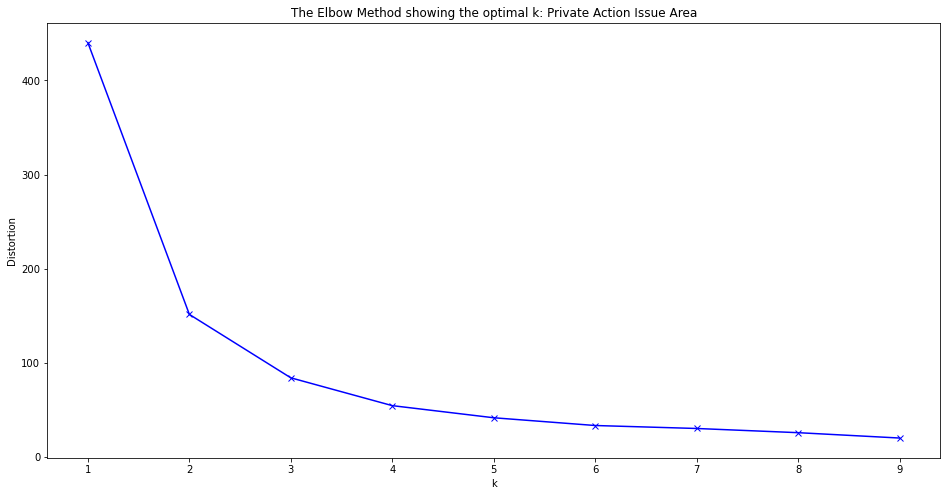

In [49]:
# Issue Area 14: Private Action
justicePA = justice[issueArea == 14]
directionPA = direction[issueArea == 14]
dataset = pd.DataFrame({'justice': justicePA, 'direction': directionPA})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Private Action Issue Area')
plt.show()